<a href="https://colab.research.google.com/github/envirodatascience/final-project-urban-treeam/blob/main/Final_Project_URI_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project for ENV 617 2024

**Research Question:**

How do street trees vary across New Haven, particularly as a result of specific management/planting choices?

**Source Data**

To address this question we will use the data available from the Urban Resources Initiative (URI)

## A) Biodiversity of urban trees in New Haven

URI prioritizes the diversity of tree species, avoiding planting too many individual trees of a single species or even a single genus in a small, localized area. The impact of emerald ash borer on white ash can exemplify the reason for this strategic approach. The outbreak of a pest or disease can cause detrimental effects on tree canopies when too many individuals are susceptible to that pest or disease and are planted in one location.

Throughout the years, New Haven has experienced almost total canopy loss of affected species from different pests and diseases such as emerald ash borer, chestnut blight, and Dutch elm disease. URI aims to protect the trees by maintaining high levels of biodiversity, which will reduce and spread out the impact of future disturbances.

The biodiversity component of our project aims to understand the current levels of biodiversity and tree conditions in New Haven and to assess to what degree URI has successfully pursued biodiversity in plantings.




**Specific questions that we are adressing:**

* What is the most common tree species in New Haven?

* What is the most biodiverse neighborhood in New Haven (street trees)?

* What is the condition of street trees in New Haven?

 ### Part 1: Set up



#### Import modules and read the data

The URI data is available on GitHub at the link below:
```
https://raw.githubusercontent.com/envirodatascience/final-project-urban-treeam/main/all_trees_58_1713995132.csv"
```

In [ ]:
# Import modules

import pandas as pd
import numpy as np
from plotnine import *
import plotnine
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
url= "https://raw.githubusercontent.com/envirodatascience/final-project-urban-treeam/main/all_trees_58_1713995132.csv"
df= pd.read_csv(url)

### Part 2: Explore and clean data


#### Structure of the data

We start exploring and looking to the structure of the data.

* Rename columns
* Check for duplicate values

In [ ]:
df.head()

,Site ID,Latitude,Longitude,(Botanical) Species,(Common) Species,Condition,DBH,Utility Wire Conflict,Grow Space,Planting Organization,Neighborhood,Planted Date,Department,(Botanical) Species (Genus),(Common) Species (Genus),Last Editor,Valuation Total,Valuation Type,Sites
0,4,41.328957,-72.975426,Vacant Site,Vacant Site,Stump,27.0,Yes,Sidewalk Planting Strip,NaN,Amity,NaN,Street Tree,Vacant Site,Vacant Site,Les Welker,0.0,Estimate,4
1,5,41.265270,-72.892364,Gleditsia triacanthos,Honeylocust,NaN,23.0,No,Sidewalk Tree Pit,NaN,East Shore,NaN,Street Tree,Gleditsia,Honeylocust,Mitch Baron,415.0,Estimate,5
2,6,41.323589,-72.908722,Cornus florida,"Dogwood, Flowering",NaN,18.0,No,Sidewalk Tree Pit,NaN,East Rock,NaN,Street Tree,Cornus,Dogwood,Mitch Baron,415.0,Estimate,6
3,7,41.263393,-72.890724,Cornus kousa,"Dogwood, Kousa",NaN,3.0,No,Sidewalk Tree Pit,NaN,East Shore,NaN,Street Tree,Cornus,Dogwood,Mitch Baron,415.0,Estimate,7
4,8,41.326874,-72.916588,Cornus kousa,"Dogwood, Kousa",NaN,4.0,No,Sidewalk Tree Pit,NaN,Prospect Hill,NaN,Street Tree,Cornus,Dogwood,Mitch Baron,415.0,Estimate,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30578 entries, 0 to 30577
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site ID                      30578 non-null  int64  
 1   Latitude                     30578 non-null  float64
 2   Longitude                    30578 non-null  float64
 3   (Botanical) Species          30578 non-null  object 
 4   (Common) Species             30578 non-null  object 
 5   Condition                    16667 non-null  object 
 6   DBH                          30578 non-null  float64
 7   Utility Wire Conflict        30578 non-null  object 
 8   Grow Space                   30578 non-null  object 
 9   Planting Organization        6796 non-null   object 
 10  Neighborhood                 30576 non-null  object 
 11  Planted Date                 7144 non-null   object 
 12  Department                   30578 non-null  object 
 13  (Botanical) Spec

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Site ID,30578.0,16221.604945,9492.386253,4.000000,7980.250000,16081.500000,24339.750000,32764.000000
Latitude,30578.0,41.312161,0.016818,41.129625,41.305305,41.315380,41.323874,41.350023
Longitude,30578.0,-72.926367,0.026863,-74.012154,-72.943749,-72.928704,-72.904856,-72.839195
DBH,30578.0,13.520587,10.686144,-2.000000,4.000000,12.000000,20.000000,146.000000
Valuation Total,30567.0,1813.985341,3691.477680,0.000000,415.000000,415.000000,1543.270000,265430.960000
Sites,30578.0,16221.604945,9492.386253,4.000000,7980.250000,16081.500000,24339.750000,32764.000000


In [ ]:
# Rename columns
new_column_names = {
    'Site ID': 'Site_ID',
    '(Common) Species': 'Common_Name',
    '(Botanical) Species': 'Latin_Name',
    'Utility Wire Conflict':'Wire',
    '(Botanical) Species (Genus)': 'Genus',
    'Valuation Total': 'Valuation_Total',
    'Last Editor': 'Last_Editor',
    'Grow Space': 'Grow_Space'
}

df = df.rename(columns=new_column_names)

df.head()


,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites
0,4,41.328957,-72.975426,Vacant Site,Vacant Site,Stump,27.0,Yes,Sidewalk Planting Strip,NaN,Amity,NaN,Street Tree,Vacant Site,Vacant Site,Les Welker,0.0,Estimate,4
1,5,41.265270,-72.892364,Gleditsia triacanthos,Honeylocust,NaN,23.0,No,Sidewalk Tree Pit,NaN,East Shore,NaN,Street Tree,Gleditsia,Honeylocust,Mitch Baron,415.0,Estimate,5
2,6,41.323589,-72.908722,Cornus florida,"Dogwood, Flowering",NaN,18.0,No,Sidewalk Tree Pit,NaN,East Rock,NaN,Street Tree,Cornus,Dogwood,Mitch Baron,415.0,Estimate,6
3,7,41.263393,-72.890724,Cornus kousa,"Dogwood, Kousa",NaN,3.0,No,Sidewalk Tree Pit,NaN,East Shore,NaN,Street Tree,Cornus,Dogwood,Mitch Baron,415.0,Estimate,7
4,8,41.326874,-72.916588,Cornus kousa,"Dogwood, Kousa",NaN,4.0,No,Sidewalk Tree Pit,NaN,Prospect Hill,NaN,Street Tree,Cornus,Dogwood,Mitch Baron,415.0,Estimate,8


<Axes: >

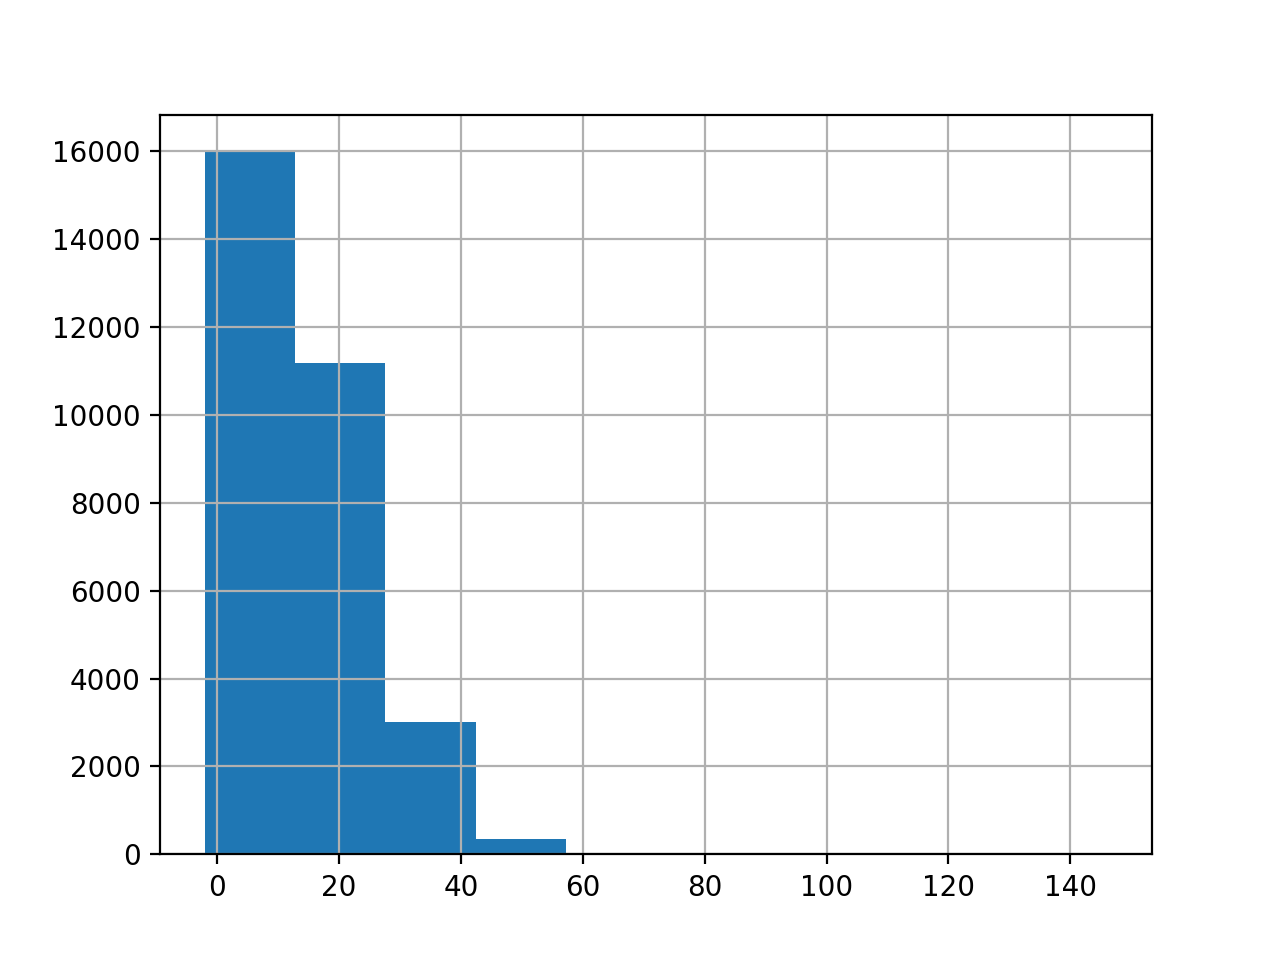

In [ ]:
# Check the distribution of DBH values
df.DBH.hist()

In [ ]:
df[df["DBH"]>100]

,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites
20244,21355,41.321732,-72.960922,Tilia americana,"Linden, American (aka Basswood)",Good,146.0,Yes,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Tilia,Linden,Les Welker,265430.96,Estimate,21355


In [ ]:
#Check for duplicates
df[df.duplicated()]

,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites


In [ ]:
df[df.duplicated(subset=["Site_ID"])]

,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites


#### Explore missing values

In [ ]:
# Check missing values in Condition, DBH, Neighborhood
df.Condition.unique()

array(['Stump', nan, 'Good', 'Fair', 'Poor', 'Very Poor', 'Excellent',
       'Standing Dead'], dtype=object)

In [ ]:
df[df.DBH.isna()]

,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites


In [ ]:
df[df.Neighborhood.isna()]

,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites
10057,10542,41.335468,-72.839195,Acer rubrum,"Maple, Red",NaN,34.0,No,Sidewalk Tree Pit,NaN,NaN,NaN,Street Tree,Acer,Maple,Alex Foreman (DRG),415.0,Estimate,10542
11481,12036,41.253235,-72.995533,Tilia americana,"Linden, American (aka Basswood)",NaN,0.0,No,Sidewalk Tree Pit,URI,NaN,2015-10-07,Street Tree,Tilia,Linden,Alex Foreman (DRG),415.0,Estimate,12036


#### Drop unnecessary values

Based on prior knowlege of the dataset, there are some specific things we want to filter out.

* Get rid of "Vacant Site"
* Drop values with DBH less than cero
* Drop NaN

Before dropping values we will create a new database df_clean.




There are some vacant sites, which are labeled as such in their latin and common names. These don't represent trees anymore, so we don't want to include them.

In [ ]:
#Get rid of "Vacant Site"

#Check the number of "Vacant Site" values
(df['Latin_Name'] == 'Vacant Site').sum()


102

In [ ]:
#Create new data frame with clean data
#Drop "Vacant Site" values
df_clean = df[df['Latin_Name'] != 'Vacant Site']

#Check the results
print((df_clean['Latin_Name'] == 'Vacant Site').sum())
print("trees remaining: ", len(df_clean))

0
trees remaining:  30476


DBH (Diameter at Breast Height) column represent the size of each tree, we don't values that are less than cero as they might represent an error.

In [ ]:
# Drop values that have DBH =<0

# Number of values that have DBH <0
len(df_clean[df_clean.DBH<=0])

387

In [ ]:
df_clean = df_clean[df_clean["DBH"]>0]
print("trees remaining: ", len(df_clean))

trees remaining:  30089


We visualize that there is a DBH value higher than 100. This might be an error as there is no tree in New Haven with such dimensions. We will drop this row too.

In [ ]:
df_clean= df_clean[~(df_clean["DBH"]>100)]

The data has missing values, so we will eliminate the rows with NaN. In addition we will drop values that have are _unknown, _other and stump as they do not respresent a specie or a living tree.


In [ ]:
#Drop Nan from Condition
df_clean = df_clean[df_clean.Condition.notna()]

In [ ]:
# Check results
df_clean[df_clean.DBH.isna()]
print("trees remaining: ", len(df_clean))

trees remaining:  16553


In [ ]:
df_clean.Latin_Name.unique()

array(['Tilia cordata', 'Stump', 'Quercus palustris', 'Ulmus americana',
       'Acer rubrum', 'Acer saccharinum', 'Cercis canadensis',
       'Crataegus spp.', 'Acer platanoides', 'Ginkgo biloba',
       'Platanus x acerifolia', 'Cercis spp.', 'Syringa reticulata',
       'Amelanchier spp', 'Acer campestre', 'Zelkova serrata',
       'Platanus occidentalis', 'Gleditsia triacanthos', 'Cornus kousa',
       'Tilia americana', 'Acer buergerianum', 'Prunus spp.',
       'Quercus rubra', 'Prunus serrulata', 'Liquidambar styraciflua',
       "Pyrus calleryana 'bradford'", 'Cercidiphyllum japonicum',
       'Ulmus pumila', 'Prunus cerasifera', 'Aesculus hippocastanum',
       'Cornus spp.', 'Ulmus spp.', 'Quercus bicolor',
       "Acer platanoides 'crimson king'", 'Acer saccharum',
       'Acer x freemanii', 'Malus tschonoskii', 'Quercus coccinea',
       'Quercus spp.', 'Cladrastis kentukea', 'Ulmus parvifolia',
       'Tilia spp.', 'Picea abies', 'Robinia pseudoacacia',
       'Carpinus be

In [ ]:
#Drop values from Columns "Latin_Name" and "Condition" that we do not need
df_clean = df_clean[df_clean['Latin_Name'] != '__UNKNOWN']
print("trees remaining: ", len(df_clean))

trees remaining:  16505


In [ ]:
df_clean = df_clean[df_clean['Latin_Name'] != '__OTHER']
print("trees remaining: ", len(df_clean))

trees remaining:  16495


In [ ]:
df_clean = df_clean[df_clean['Latin_Name'] != 'Stump']
print("trees remaining: ", len(df_clean))

trees remaining:  15515


In [ ]:
df_clean = df_clean[df_clean['Condition'] != 'Stump']
print("trees remaining: ", len(df_clean))

trees remaining:  15383


Until this part, **df_clean** it is our clean data set"

In [ ]:
#print("Until this part, df_clean it is our clean data set")
print("df_clean:", df_clean.shape)

df_clean: (15383, 19)


### Part 3: Summarize data

We are going to summarize the data in several tables, to understand the number and condition of tree species.

##### Table of number of trees per Condition

In [ ]:
# Number of trees in each Neighborhood (total)
df_neig = df_clean.groupby('Neighborhood').agg(Trees=('Latin_Name','count')).reset_index()
df_neig

In [ ]:
# Number of species in each Neighborhood (total)
df_species = df_clean.groupby('Neighborhood').agg(Tree_Species =('Latin_Name','nunique')).reset_index()
df_species

,Neighborhood,Tree_Species
0,Amity,46
1,Annex,77
2,Beaver Hills,56
3,Cedar Hill,38
4,Dixwell,88
5,Downtown,36
6,Dwight,69
7,East Rock,64
8,East Shore,57
9,Edgewood,61


In [ ]:
# Condition of trees in New Haven
df_a = df_clean.groupby(['Neighborhood','Condition']).agg(Trees_Condition = ('Latin_Name','count')).reset_index()
df_cond=df_a.pivot(index='Neighborhood', columns='Condition', values='Trees_Condition').reset_index()

In [ ]:
# Replace NaN for cero in Condition data frame
df_cond.fillna(0, inplace=True)
df_cond

Condition,Neighborhood,Excellent,Fair,Good,Poor,Standing Dead,Very Poor
0,Amity,64.0,22.0,49.0,6.0,2.0,5.0
1,Annex,139.0,281.0,235.0,111.0,4.0,28.0
2,Beaver Hills,72.0,24.0,92.0,6.0,4.0,4.0
3,Cedar Hill,20.0,42.0,69.0,16.0,7.0,1.0
4,Dixwell,365.0,360.0,520.0,184.0,14.0,46.0
5,Downtown,43.0,40.0,58.0,26.0,23.0,14.0
6,Dwight,95.0,325.0,275.0,148.0,5.0,45.0
7,East Rock,111.0,32.0,187.0,22.0,8.0,15.0
8,East Shore,108.0,32.0,97.0,1.0,2.0,2.0
9,Edgewood,65.0,18.0,53.0,3.0,0.0,3.0


##### Table of percentage of trees per condition

In [ ]:
# Percentage of trees in each condition
# Calculate the total number of trees in each neighborhood
total_trees_neighborhood = df_clean.groupby('Neighborhood')['Latin_Name'].count()

# Calculate the percentage of trees in each condition for each neighborhood
df_a = df_clean.groupby(['Neighborhood', 'Condition'])['Latin_Name'].count() / total_trees_neighborhood * 100
df_a = df_a.reset_index(name='Trees_Condition_Percentage')

# Pivot the DataFrame to have neighborhoods as rows and conditions as columns
df_condition_percentage = df_a.pivot(index='Neighborhood', columns='Condition', values='Trees_Condition_Percentage').reset_index()

df_condition_percentage

Condition,Neighborhood,Excellent,Fair,Good,Poor,Standing Dead,Very Poor
0,Amity,43.243243,14.864865,33.108108,4.054054,1.351351,3.378378
1,Annex,17.418546,35.213033,29.448622,13.909774,0.501253,3.508772
2,Beaver Hills,35.643564,11.881188,45.544554,2.970297,1.980198,1.980198
3,Cedar Hill,12.903226,27.096774,44.516129,10.322581,4.516129,0.645161
4,Dixwell,24.513096,24.177300,34.922767,12.357287,0.940228,3.089322
5,Downtown,21.078431,19.607843,28.431373,12.745098,11.274510,6.862745
6,Dwight,10.638298,36.394177,30.795073,16.573348,0.559910,5.039194
7,East Rock,29.600000,8.533333,49.866667,5.866667,2.133333,4.000000
8,East Shore,44.628099,13.223140,40.082645,0.413223,0.826446,0.826446
9,Edgewood,45.774648,12.676056,37.323944,2.112676,NaN,2.112676


The neighborhood with the highest percentage of tress in very poor condition.

In [ ]:
#Sort the results DataFrame by Shannon_Index and Simpson_Index in descending order
Vpoor_nei=df_condition_percentage.sort_values(by= 'Very Poor', ascending=False)
Vpoor_nei = Vpoor_nei.fillna(0)
print("Neighborhood witht the highest % trees in  very poor condition:", Vpoor_nei.head(5), "%")

Neighborhood witht the highest % trees in  very poor condition: Condition Neighborhood  Excellent       Fair       Good       Poor  \
5             Downtown  21.078431  19.607843  28.431373  12.745098   
17          West River  21.880065  25.931929  29.659643  15.235008   
10          Fair Haven  17.320923  31.687576  28.935654  14.407123   
13          Long Wharf  11.827957  29.032258  46.236559   5.376344   
6               Dwight  10.638298  36.394177  30.795073  16.573348   

Condition  Standing Dead  Very Poor  
5              11.274510   6.862745  
17              1.296596   5.996759  
10              2.144881   5.503845  
13              2.150538   5.376344  
6               0.559910   5.039194   %


##### Table of General Condition of trees by neighborhood

In [ ]:
# Create DataFrame
dfm = pd.DataFrame(df_cond)
dfm= dfm.fillna(0)

# Function to find the column name with the highest value for each row
def get_max_column(row):
    max_value = max(row[1:])  # Exclude the Neighborhood column
    return dfm.columns[1:][row[1:].values.argmax()] if max_value == max_value else None

# Apply the function to each row
dfm['Highest_Value_Column'] = dfm.apply(get_max_column, axis=1)

# Resulting DataFrame
print("Table of the most common specie per neighborhood")
print(dfm[['Neighborhood', 'Highest_Value_Column']])

Table of the most common specie per neighborhood
Condition                 Neighborhood Highest_Value_Column
0                                Amity            Excellent
1                                Annex                 Fair
2                         Beaver Hills                 Good
3                           Cedar Hill                 Good
4                              Dixwell                 Good
5                             Downtown                 Good
6                               Dwight                 Fair
7                            East Rock                 Good
8                           East Shore            Excellent
9                             Edgewood            Excellent
10                          Fair Haven                 Fair
11                  Fair Haven Heights            Excellent
12                                Hill                 Good
13                          Long Wharf                 Good
14                        Newhallville             

In [ ]:
# Summary table trees and species per neighborhood
df_tab= df_neig.merge(df_species, how='outer', on='Neighborhood', indicator = True)
df_tab

,Neighborhood,Trees,Tree_Species,_merge
0,Amity,148,46,both
1,Annex,798,77,both
2,Beaver Hills,202,56,both
3,Cedar Hill,155,38,both
4,Dixwell,1489,88,both
5,Downtown,204,36,both
6,Dwight,893,69,both
7,East Rock,375,64,both
8,East Shore,242,57,both
9,Edgewood,142,61,both


##### Summary of number, species and condition of trees per neighborhood

In [ ]:
# Summary table of trees and species + Condition
df_neitree= df_tab.merge(df_cond, how='inner', on='Neighborhood')
df_neitree

,Neighborhood,Trees,Tree_Species,_merge,Excellent,Fair,Good,Poor,Standing Dead,Very Poor
0,Amity,148,46,both,64.0,22.0,49.0,6.0,2.0,5.0
1,Annex,798,77,both,139.0,281.0,235.0,111.0,4.0,28.0
2,Beaver Hills,202,56,both,72.0,24.0,92.0,6.0,4.0,4.0
3,Cedar Hill,155,38,both,20.0,42.0,69.0,16.0,7.0,1.0
4,Dixwell,1489,88,both,365.0,360.0,520.0,184.0,14.0,46.0
5,Downtown,204,36,both,43.0,40.0,58.0,26.0,23.0,14.0
6,Dwight,893,69,both,95.0,325.0,275.0,148.0,5.0,45.0
7,East Rock,375,64,both,111.0,32.0,187.0,22.0,8.0,15.0
8,East Shore,242,57,both,108.0,32.0,97.0,1.0,2.0,2.0
9,Edgewood,142,61,both,65.0,18.0,53.0,3.0,0.0,3.0


In [ ]:
df_neitree._merge.unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
# Drop _merge column
df_neitree = df_neitree.drop("_merge",axis=1)
print(df_neitree.head())

In [ ]:
df_neitree

,Neighborhood,Trees,Tree_Species,Excellent,Fair,Good,Poor,Standing Dead,Very Poor
0,Amity,148,46,64.0,22.0,49.0,6.0,2.0,5.0
1,Annex,798,77,139.0,281.0,235.0,111.0,4.0,28.0
2,Beaver Hills,202,56,72.0,24.0,92.0,6.0,4.0,4.0
3,Cedar Hill,155,38,20.0,42.0,69.0,16.0,7.0,1.0
4,Dixwell,1489,88,365.0,360.0,520.0,184.0,14.0,46.0
5,Downtown,204,36,43.0,40.0,58.0,26.0,23.0,14.0
6,Dwight,893,69,95.0,325.0,275.0,148.0,5.0,45.0
7,East Rock,375,64,111.0,32.0,187.0,22.0,8.0,15.0
8,East Shore,242,57,108.0,32.0,97.0,1.0,2.0,2.0
9,Edgewood,142,61,65.0,18.0,53.0,3.0,0.0,3.0


### Part 4: Analize data

For our project we will concentrate in data from street trees.

To calculate diversity we will use two diversity indexes.

* **Shannon index**

A higher Shannon value will indicate higher biodiversity

* **Simpson index**

A lower Simpson value will indicate higher biodiversity.

In [ ]:
#  Create data frame with street trees
df_streets = df_clean[df_clean["Department"] == "Street Tree"]
df_streets

In [ ]:
# Create data frame with proportions
df2= df_streets.groupby(['Neighborhood', "Latin_Name"]).agg(Individuals=('Latin_Name','count')).reset_index()
df2_h= pd.DataFrame(df2)

In [ ]:
df2_h= df2.merge(df_neig, how='outer', on='Neighborhood', indicator = True)

In [ ]:
df2_h._merge.unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
# Calculate proportions of individuals for each species in each neighborhood
df2_h['Individual_proportions'] = df2_h['Individuals'] / df2_h['Trees']

# Group the DataFrame by 'Neighborhood' and aggregate the individual proportions for each neighborhood
grouped_neighborhoods = df2_h.groupby('Neighborhood')['Individual_proportions'].apply(list)

# Calculate Shannon and Simpson indices for each neighborhood
shannon_indices = []
simpson_indices = []

for neighborhood, proportions in grouped_neighborhoods.items():
    shannon_index = -sum(p * np.log(p) if p != 0 else 0 for p in proportions)
    shannon_indices.append(shannon_index)

    simpson_index = sum(p ** 2 for p in proportions)
    simpson_indices.append(simpson_index)

# Create a new DataFrame to store the results
results_df = pd.DataFrame({
    'Neighborhood': grouped_neighborhoods.index,
    'Shannon_Index': shannon_indices,
    'Simpson_Index': simpson_indices
})

# Print the results
print(results_df)

                   Neighborhood  Shannon_Index  Simpson_Index
0                         Amity       3.260640       0.035838
1                         Annex       3.103690       0.074913
2                  Beaver Hills       3.375349       0.027791
3                    Cedar Hill       2.944255       0.071467
4                       Dixwell       3.136951       0.057432
5                      Downtown       2.801280       0.071895
6                        Dwight       3.120272       0.076315
7                     East Rock       3.647312       0.024647
8                    East Shore       3.420733       0.048272
9                      Edgewood       2.862854       0.021821
10                   Fair Haven       3.301562       0.045573
11           Fair Haven Heights       3.004741       0.038710
12                         Hill       3.211228       0.063499
13                   Long Wharf       1.616363       0.307203
14                 Newhallville       3.217962       0.071696
15      

We order the results from the ones with highest Shannon and Simpson index to see more clearly which are the most biodiverse neighborhoods

In [ ]:
# Sort the results DataFrame by Shannon_Index and Simpson_Index in descending order
results_df_sorted=results_df.sort_values(by=['Shannon_Index', 'Simpson_Index'], ascending=False)
print(results_df_sorted)

                   Neighborhood  Shannon_Index  Simpson_Index
19                    Westville       3.724590       0.033192
7                     East Rock       3.647312       0.024647
8                    East Shore       3.420733       0.048272
2                  Beaver Hills       3.375349       0.027791
17                   West River       3.356548       0.064152
15                Prospect Hill       3.314400       0.028769
10                   Fair Haven       3.301562       0.045573
0                         Amity       3.260640       0.035838
14                 Newhallville       3.217962       0.071696
12                         Hill       3.211228       0.063499
4                       Dixwell       3.136951       0.057432
6                        Dwight       3.120272       0.076315
1                         Annex       3.103690       0.074913
11           Fair Haven Heights       3.004741       0.038710
3                    Cedar Hill       2.944255       0.071467
16      

### Part 5: Visualize data



In [ ]:
# Unzip amd read data
! wget "https://github.com/envirodatascience/final-project-urban-treeam/raw/main/Neighborhoods.zip"
! unzip /content/Neighborhoods.zip


In [ ]:
nei= "/content/New_Haven_CT_Neighborhoods.shp"
nei=gpd.read_file(nei)
nei.rename(columns={'Neighbor_1': 'Neighborhood'}, inplace=True)
nei

In [ ]:
nei.shape

(21, 10)

#### Clean data

The Dataset of Neighborhoods in New Haven needs to be cleaned, so we can use it to visualize our data.

* Eliminate Wooster Square and Mill River Neighborhoods.

Notably, wooster square and mill river both have "NA" trees. This is because the original dataset lumps these two neighborhoods together. No inventory has been recently conducted, so there are very few usable datapoints from these two neighborhoods anyway

In [ ]:
# Eliminate Wooster Square and Mill River Neighborhoods
clean_nei = nei[~nei["Neighborhood"].isin(["Wooster Square", "Mill River"])]

In [ ]:
clean_nei.Neighborhood.unique()

array(['Dwight', 'Edgewood', 'Downtown', 'Dixwell', 'Newhallville',
       'Prospect Hill', 'West River', 'Beaver Hills', 'Amity',
       'Long Wharf', 'Fair Haven', 'East Rock', 'Fair Haven Heights',
       'West Rock', 'Annex', 'Hill', 'Quinnipiac Meadows', 'East Shore',
       'Westville'], dtype=object)

In [ ]:
clean_nei.shape

(19, 10)

#### Results

##### **Question 1**

What is the most common tree specie in New Haven?


In [ ]:
# Number of trees per specie  (total)
df_common = df_streets.groupby('Latin_Name').agg(Number_trees=('Latin_Name','count')).reset_index()
df_common

,Latin_Name,Number_trees
0,Abies concolor,1
1,Abies spp.,2
2,Acer buergerianum,99
3,Acer campestre,114
4,Acer ginnala,4
...,...,...
138,Ulmus carpinifolia 'hollandica',2
139,Ulmus parvifolia,128
140,Ulmus pumila,93
141,Ulmus spp.,234


###### Most common tree specie

In [ ]:
#Sort the results DataFrame by Shannon_Index and Simpson_Index in descending order
Max_specie=df_common.sort_values(by= 'Number_trees', ascending=False)
print("Most common tree species in New Haven:", Max_specie.head(1), "individuals")

Most common tree species in New Haven:             Latin_Name  Number_trees
113  Quercus palustris          1609 individuals


In [ ]:
# Number of species in each Neighborhood (total)
df_species2 = df_streets.groupby('Latin_Name').agg(No_neighborhood =('Neighborhood','nunique')).reset_index()
df_species2

,Latin_Name,No_neighborhood
0,Abies concolor,1
1,Abies spp.,2
2,Acer buergerianum,17
3,Acer campestre,14
4,Acer ginnala,3
...,...,...
138,Ulmus carpinifolia 'hollandica',2
139,Ulmus parvifolia,15
140,Ulmus pumila,8
141,Ulmus spp.,18


###### Tree species found in the most number of neighborhoods

In [ ]:
#Sort the results DataFrame by
Max_specie2=df_species2.sort_values(by= 'No_neighborhood', ascending=False)
print("Tree species found in the most number of neighbohoods:", Max_specie2.head(1), "neighborhoods")

Tree species found in the most number of neighbohoods:            Latin_Name  No_neighborhood
71  Malus tschonoskii               21 neighborhoods


###### Map for most common specie


For making this map we will be using 2 dataset: df_clean and clean_nei. We will merge this two datasets by "Neighborhood". We need to check that the names of the Neighborhoods are the same in both datasets.

In [ ]:
# Check the neighborhoods
print("df_clean:",df_clean.Neighborhood.nunique())
print("clean_nei:",clean_nei.Neighborhood.nunique())

df_clean: 21
clean_nei: 19


The datasets do not have the same number of neighborhood, we will fix this

In [ ]:
# Extract unique values of 'Neighborhood' column from each DataFrame
unique_neighborhoods_streets = set(df_clean['Neighborhood'].unique())
unique_neighborhoods_clean_nei = set(clean_nei['Neighborhood'].unique())

# Find differences
different_neighborhoods = unique_neighborhoods_streets.symmetric_difference(unique_neighborhoods_clean_nei)

# Print the different values
print("Different neighborhoods:")
for neighborhood in different_neighborhoods:
    print(neighborhood)

Different neighborhoods:
Cedar Hill
Wooster Square / Mill River


In [ ]:
df_clean.Neighborhood.unique()

array(['Westville', 'Dixwell', 'West River', 'East Shore', 'Hill',
       'Dwight', 'Newhallville', 'East Rock', 'Annex', 'Fair Haven',
       'Prospect Hill', 'Wooster Square / Mill River', 'Beaver Hills',
       'Downtown', 'Edgewood', 'Long Wharf', 'Fair Haven Heights',
       'Quinnipiac Meadows', 'West Rock', 'Amity', 'Cedar Hill'],
      dtype=object)

We will drop "Wooster Square / Mill River" as we have drop these two neighborhoods in a previous step, while cleaning the Neighorhood database.

In [ ]:
# Drop values
df_clean_map = df_clean[~((df_clean["Neighborhood"] == "Wooster Square / Mill River") | (df_clean["Neighborhood"] == "Cedar Hill"))]
df_clean_map

,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites
6,10,41.323845,-72.966499,Tilia cordata,"Linden, Littleleaf",Good,22.0,Yes,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Tilia,Linden,Les Welker,6432.44,Estimate,10
9,15,41.321150,-72.965372,Quercus palustris,"Oak, Pin",Fair,23.0,No,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Quercus,Oak,Hannah Vase,5347.68,Estimate,15
11,18,41.324207,-72.966171,Tilia cordata,"Linden, Littleleaf",Fair,18.0,Yes,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Tilia,Linden,Les Welker,3436.15,Estimate,18
38,47,41.312145,-72.932159,Ulmus americana,"Elm, American",Fair,18.0,Yes,Sidewalk Tree Pit,NaN,Dixwell,NaN,Street Tree,Ulmus,Elm,Les Welker,3436.15,Estimate,47
52,62,41.313030,-72.963799,Acer rubrum,"Maple, Red",Fair,16.0,Yes,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Acer,Maple,Les Welker,2802.08,Estimate,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30573,32760,41.302520,-72.904398,Catalpa speciosa,"Catalpa, Northern",Excellent,2.0,No,Yard/Park/Open space,URI GreenSkills,Fair Haven,2024-04-20,Street Tree,Catalpa,Catalpa,Joshua De-Anda,470.95,Estimate,32760
30574,32761,41.302403,-72.904364,Catalpa speciosa,"Catalpa, Northern",Excellent,2.0,No,Yard/Park/Open space,URI GreenSkills,Fair Haven,2024-04-20,Street Tree,Catalpa,Catalpa,Joshua De-Anda,470.95,Estimate,32761
30575,32762,41.324250,-72.946949,Cornus kousa,"Dogwood, Kousa",Excellent,2.0,Yes,Sidewalk Planting Strip,NaN,Beaver Hills,NaN,Street Tree,Cornus,Dogwood,Michael Freiburger,470.95,Estimate,32762
30576,32763,41.325883,-72.947242,Cornus 'constellation',"Dogwood, constellation",Excellent,2.0,Yes,Sidewalk Planting Strip,NaN,Beaver Hills,NaN,Street Tree,Cornus,Dogwood,Michael Freiburger,470.95,Estimate,32763


In [ ]:
# Check the neighborhoods
print("df_clean_map:",df_clean_map.Neighborhood.nunique())
print("clean_nei:",clean_nei.Neighborhood.nunique())

df_clean_map: 19
clean_nei: 19


In [ ]:
# Merge datasets
df_map = df_clean_map.merge(clean_nei, how='outer', on='Neighborhood', indicator = True)

In [ ]:
df_clean_map.head()

,Site_ID,Latitude,Longitude,Latin_Name,Common_Name,Condition,DBH,Wire,Grow_Space,Planting Organization,Neighborhood,Planted Date,Department,Genus,(Common) Species (Genus),Last_Editor,Valuation_Total,Valuation Type,Sites
6,10,41.323845,-72.966499,Tilia cordata,"Linden, Littleleaf",Good,22.0,Yes,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Tilia,Linden,Les Welker,6432.44,Estimate,10
9,15,41.321150,-72.965372,Quercus palustris,"Oak, Pin",Fair,23.0,No,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Quercus,Oak,Hannah Vase,5347.68,Estimate,15
11,18,41.324207,-72.966171,Tilia cordata,"Linden, Littleleaf",Fair,18.0,Yes,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Tilia,Linden,Les Welker,3436.15,Estimate,18
38,47,41.312145,-72.932159,Ulmus americana,"Elm, American",Fair,18.0,Yes,Sidewalk Tree Pit,NaN,Dixwell,NaN,Street Tree,Ulmus,Elm,Les Welker,3436.15,Estimate,47
52,62,41.313030,-72.963799,Acer rubrum,"Maple, Red",Fair,16.0,Yes,Sidewalk Planting Strip,NaN,Westville,NaN,Street Tree,Acer,Maple,Les Welker,2802.08,Estimate,62


In [ ]:
# Check merge
df_map._merge.unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
# Drop _merge column
df_map = df_map.drop("_merge",axis=1)

In [ ]:
# df_map is the data set that contains the
df_map.columns

Index(['Site_ID', 'Latitude', 'Longitude', 'Latin_Name', 'Common_Name',
       'Condition', 'DBH', 'Wire', 'Grow_Space', 'Planting Organization',
       'Neighborhood', 'Planted Date', 'Department', 'Genus',
       '(Common) Species (Genus)', 'Last_Editor', 'Valuation_Total',
       'Valuation Type', 'Sites', 'OBJECTID', 'ACRES', 'Neighborho',
       'Shape_area', 'Shape_len', 'Shape__Are', 'Shape__Len', 'UTC_2016',
       'geometry'],
      dtype='object')

In [ ]:
# Data frame filtering only streets from General data  with polygons
df_map_streets = df_map[df_map["Department"] == "Street Tree"]
df_map_streets

In [ ]:
# Big data with species names
df_b = df_map_streets.groupby(['Latin_Name','Neighborhood']).agg(Trees_Species = ('Latin_Name','count')).reset_index()
df_cond2=df_b.pivot(index='Neighborhood', columns='Latin_Name', values='Trees_Species').reset_index()
df_cond2

Latin_Name,Neighborhood,Abies concolor,Abies spp.,Acer buergerianum,Acer campestre,Acer ginnala,Acer griseum,Acer miyabei,Acer negundo,Acer palmatum,...,Tilia cordata,Tilia euchlora,Tilia spp.,Tilia tomentosa,Ulmus americana,Ulmus carpinifolia 'hollandica',Ulmus parvifolia,Ulmus pumila,Ulmus spp.,Zelkova serrata
0,Amity,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,NaN,NaN,2.0,2.0,NaN,3.0,NaN,NaN,NaN
1,Annex,NaN,NaN,12.0,4.0,NaN,NaN,3.0,NaN,NaN,...,34.0,NaN,2.0,1.0,5.0,NaN,5.0,16.0,3.0,2.0
2,Beaver Hills,NaN,NaN,NaN,1.0,1.0,NaN,3.0,NaN,NaN,...,4.0,NaN,1.0,1.0,NaN,NaN,9.0,NaN,NaN,5.0
3,Dixwell,NaN,NaN,11.0,10.0,NaN,1.0,2.0,NaN,NaN,...,51.0,NaN,NaN,1.0,29.0,NaN,10.0,7.0,34.0,50.0
4,Downtown,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,13.0,NaN,9.0,NaN,12.0,4.0
5,Dwight,NaN,NaN,6.0,1.0,NaN,1.0,3.0,NaN,NaN,...,35.0,NaN,1.0,2.0,48.0,1.0,2.0,23.0,20.0,25.0
6,East Rock,NaN,NaN,8.0,6.0,NaN,3.0,6.0,NaN,NaN,...,9.0,2.0,2.0,2.0,NaN,NaN,10.0,2.0,7.0,4.0
7,East Shore,NaN,NaN,5.0,5.0,1.0,1.0,2.0,NaN,NaN,...,5.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,8.0,1.0
8,Edgewood,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,4.0
9,Fair Haven,NaN,NaN,7.0,19.0,NaN,9.0,7.0,NaN,NaN,...,89.0,4.0,NaN,3.0,18.0,NaN,18.0,9.0,60.0,100.0


In [ ]:
# Merge data of species with geometry
df_map_streets_geom = df_cond2.merge(clean_nei, how='outer', on='Neighborhood', indicator = True)

In [ ]:
# Check merge
df_map_streets_geom._merge.unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
df_map_streets_geom.head()

,Neighborhood,Abies concolor,Abies spp.,Acer buergerianum,Acer campestre,Acer ginnala,Acer griseum,Acer miyabei,Acer negundo,Acer palmatum,...,OBJECTID,ACRES,Neighborho,Shape_area,Shape_len,Shape__Are,Shape__Len,UTC_2016,geometry,_merge
0,Amity,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,12,470.91,AMITY,2.051293e+07,19865.718411,3.383045e+06,8065.737875,.36,"POLYGON ((-8122986.721 5062944.439, -8122936.3...",both
1,Annex,NaN,NaN,12.0,4.0,NaN,NaN,3.0,NaN,NaN,...,22,877.07,ANNEX,3.820526e+07,27866.216819,6.292540e+06,11311.987361,.19,"POLYGON ((-8114363.662 5056907.349, -8114323.9...",both
2,Beaver Hills,NaN,NaN,NaN,1.0,1.0,NaN,3.0,NaN,NaN,...,13,442.60,BEAVER HILLS,1.927978e+07,19328.539681,3.178991e+06,7851.203088,.33,"POLYGON ((-8120010.855 5062053.576, -8119990.1...",both
3,Dixwell,NaN,NaN,11.0,10.0,NaN,1.0,2.0,NaN,NaN,...,7,336.78,DIXWELL,1.475696e+07,18107.206310,2.432593e+06,7350.678432,.21,"POLYGON ((-8119801.427 5059109.589, -8119911.5...",both
4,Downtown,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,302.08,DOWNTOWN,1.315854e+07,16821.576475,2.168458e+06,6828.556824,.17,"POLYGON ((-8118173.770 5058949.906, -8118143.2...",both


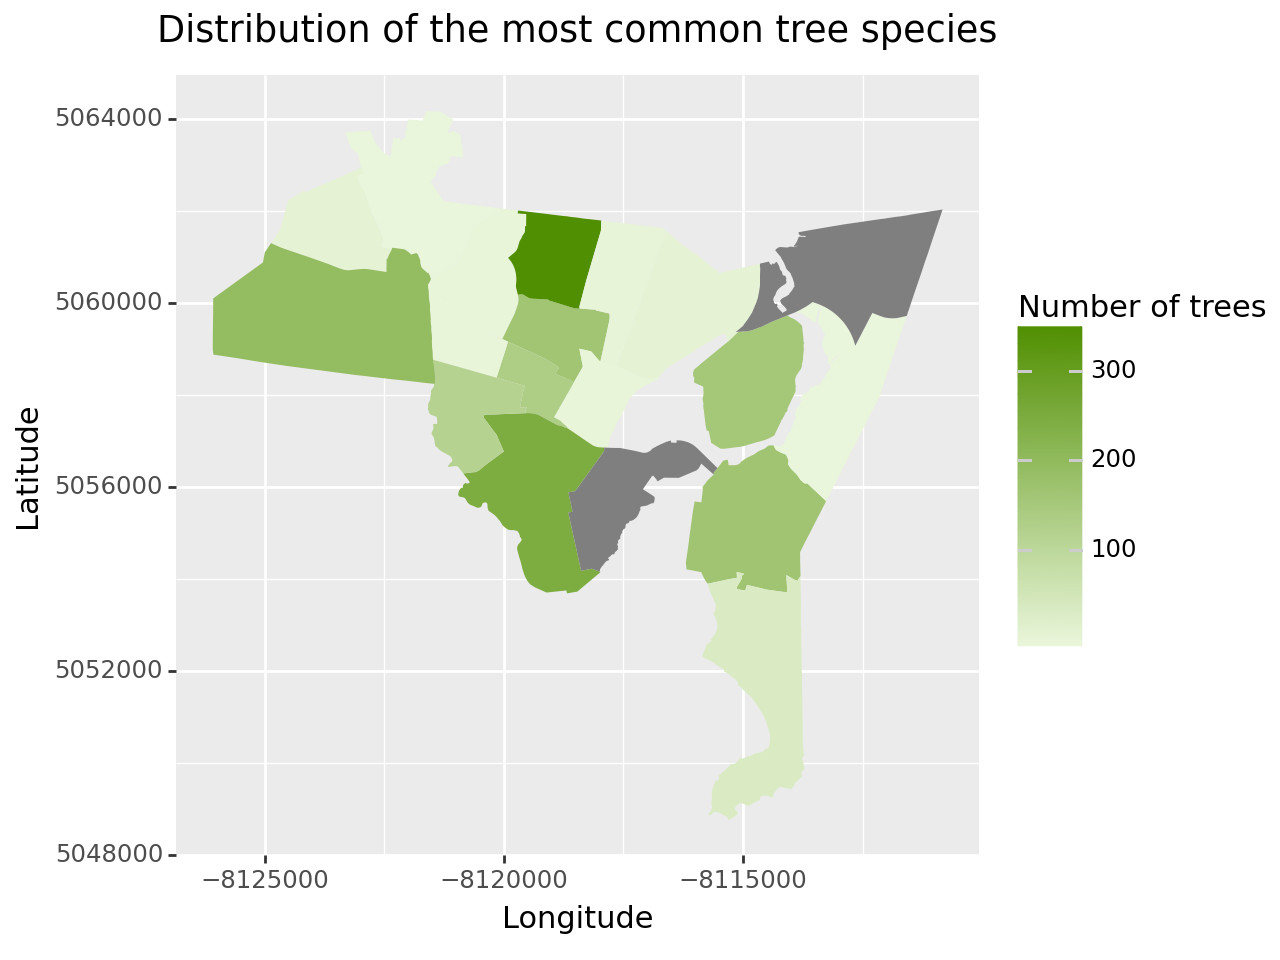

<Figure Size: (640 x 480)>

In [ ]:
# Create the map with most common species
(
  ggplot()
   + geom_map(df_map_streets_geom, aes(geometry='geometry', fill='Quercus palustris'),color=None)
   + scale_fill_gradient(low="#eaf6db", high="#518f02")
   + xlab('Longitude')
   + ylab('Latitude')
   + ggtitle("Distribution of the most common tree species")
   + theme(plot_title = element_text(hjust = 0.8),)
   #        legend_text=element_text(size=12))
   + labs(fill="Number of trees")
)


##### **Question 2**

What is the most biodiverse neighborhood in New Haven?

Nuevo

To map the diversity of tree species we will use to data frames results_df and clean_nei. We will merge the databases using "right" because clean_nei is already clean and results_df is not.

In [ ]:
# Check if data bases are clean. They should have 19 neighborhoods
clean_nei.Neighborhood.nunique()

19

In [ ]:
results_df.Neighborhood.nunique()

21

In [ ]:
map_biodiversity = results_df.merge(clean_nei, on = "Neighborhood", how="right", indicator=True)

In [ ]:
map_biodiversity._merge.unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
#Drop _merge column
map_biodiversity = map_biodiversity.drop(columns='_merge')

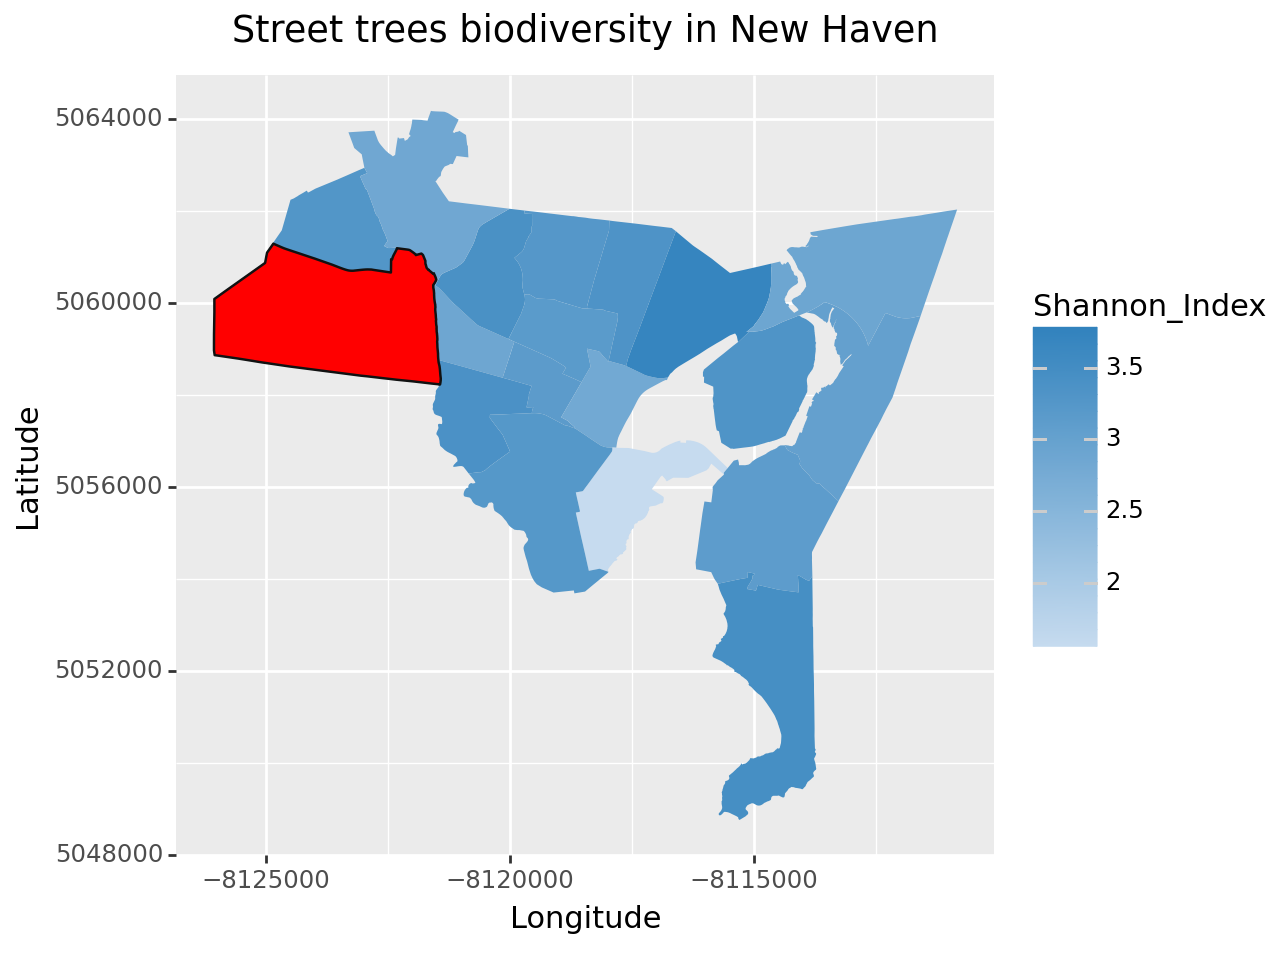

<Figure Size: (640 x 480)>

In [ ]:
# Map biodiversity index

# Calculate the maximum value of the Shannon_Index column
max_value = map_biodiversity['Shannon_Index'].max()
(
  ggplot()
   + geom_map(map_biodiversity, aes(geometry='geometry', fill="Shannon_Index"),color=None)
   + scale_fill_gradient(low="#c6dbef", high="#3182bd")
   + geom_map(map_biodiversity[map_biodiversity['Shannon_Index'] == max_value], aes(geometry='geometry'), fill="red")
   + xlab('Longitude')
   + ylab('Latitude')
   + ggtitle("Street trees biodiversity in New Haven")
   + theme(plot_title = element_text(hjust = 0.8))
)

In [ ]:
print("The neighborhood with the highest Shannon value is:", results_df_sorted.head(1))

The neighborhood with the highest Shannon value is:    Neighborhood  Shannon_Index  Simpson_Index
19    Westville        3.72459       0.033192


###### Map of the number of species per neighborhood.

diversity

In [ ]:
# Number of species in each Neighborhood (total)
species_streets = df_clean.groupby('Neighborhood').agg(Tree_Species =('Latin_Name','nunique')).reset_index()
species_streets

,Neighborhood,Tree_Species
0,Amity,46
1,Annex,77
2,Beaver Hills,56
3,Cedar Hill,38
4,Dixwell,88
5,Downtown,36
6,Dwight,69
7,East Rock,64
8,East Shore,57
9,Edgewood,61


In [ ]:
# Merge data from species_streets and clean_nei
map_biodiversity2 = species_streets.merge(clean_nei, on = "Neighborhood", how ="right", indicator=True)

In [ ]:
map_biodiversity2._merge.unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
map_biodiversity2.head(2)

,Neighborhood,Tree_Species,OBJECTID,ACRES,Neighborho,Shape_area,Shape_len,Shape__Are,Shape__Len,UTC_2016,geometry,_merge
0,Dwight,69,8,202.58,DWIGHT,8.824339e+06,15305.198643,1.454318e+06,6212.201826,.19,"POLYGON ((-8119801.427 5059109.589, -8119667.0...",both
1,Edgewood,61,10,237.69,EDGEWOOD,1.035363e+07,14738.643104,1.706680e+06,5985.096078,.34,"POLYGON ((-8119911.510 5059160.851, -8119977.4...",both


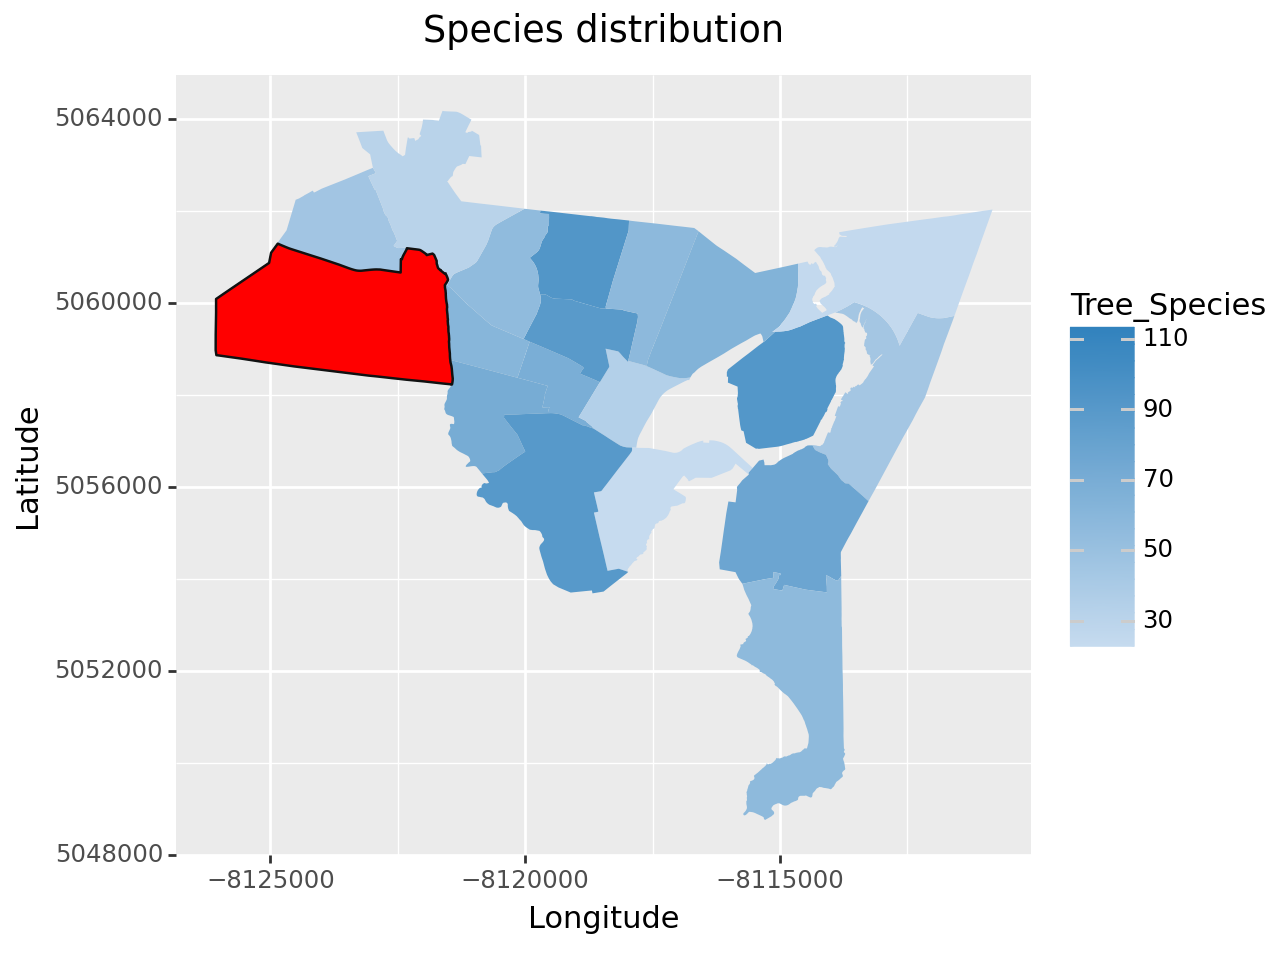

<Figure Size: (640 x 480)>

In [ ]:
# Create the map with most common species

# Calculate the maximum value of number of species per neighborhood
max_value = map_biodiversity2['Tree_Species'].max()
(
  ggplot()
   + geom_map(map_biodiversity2, aes(geometry='geometry', fill='Tree_Species'),color=None)
   + scale_fill_gradient(low="#c6dbef", high="#3182bd")
   + geom_map(map_biodiversity[map_biodiversity2['Tree_Species'] == max_value], aes(geometry='geometry'), fill="red")
   + xlab('Longitude')
   + ylab('Latitude')
   + ggtitle("Species distribution")
   + theme(plot_title = element_text(hjust = 0.8))
)

In [ ]:
#Sort the results DataFrame by Shannon_Index and Simpson_Index in descending order
results_df_sorted2=map_biodiversity2.sort_values(by=["Tree_Species"], ascending=False)

In [ ]:
print("The neighborhood with the most number of species is:",results_df_sorted2.head(1))

The neighborhood with the most number of species is:    Neighborhood  Tree_Species  OBJECTID    ACRES Neighborho    Shape_area  \
18    Westville           111        18  1461.13  WESTVILLE  6.364700e+07   

       Shape_len    Shape__Are    Shape__Len UTC_2016  \
18  35267.611828  1.049256e+07  14314.201649      .51   

                                             geometry _merge  
18  POLYGON ((-8124874.872 5061288.566, -8124864.1...   both  


##### Question 3

What is the condition of Street trees in New Haven?

###### Barplot showing %trees in each condition per neighborhood.

In [ ]:
df_bar = df_streets[~((df_streets["Neighborhood"] == "Wooster Square / Mill River") | (df_streets["Neighborhood"] == "Cedar Hill"))]


In [ ]:
# Calculate the total number of trees in each neighborhood
total_trees_neighborhood = df_bar.groupby('Neighborhood')['Latin_Name'].count()

# Calculate the percentage of trees in each condition for each neighborhood
df_a = df_bar.groupby(['Neighborhood', 'Condition'])['Latin_Name'].count() / total_trees_neighborhood * 100
df_a = df_a.reset_index(name='Trees_Condition_Percentage')

# Pivot the DataFrame to have neighborhoods as rows and conditions as columns
df_cond = df_a.pivot(index='Neighborhood', columns='Condition', values='Trees_Condition_Percentage').reset_index()

# Fill NaN values with 0
df_cond = df_cond.fillna(0)


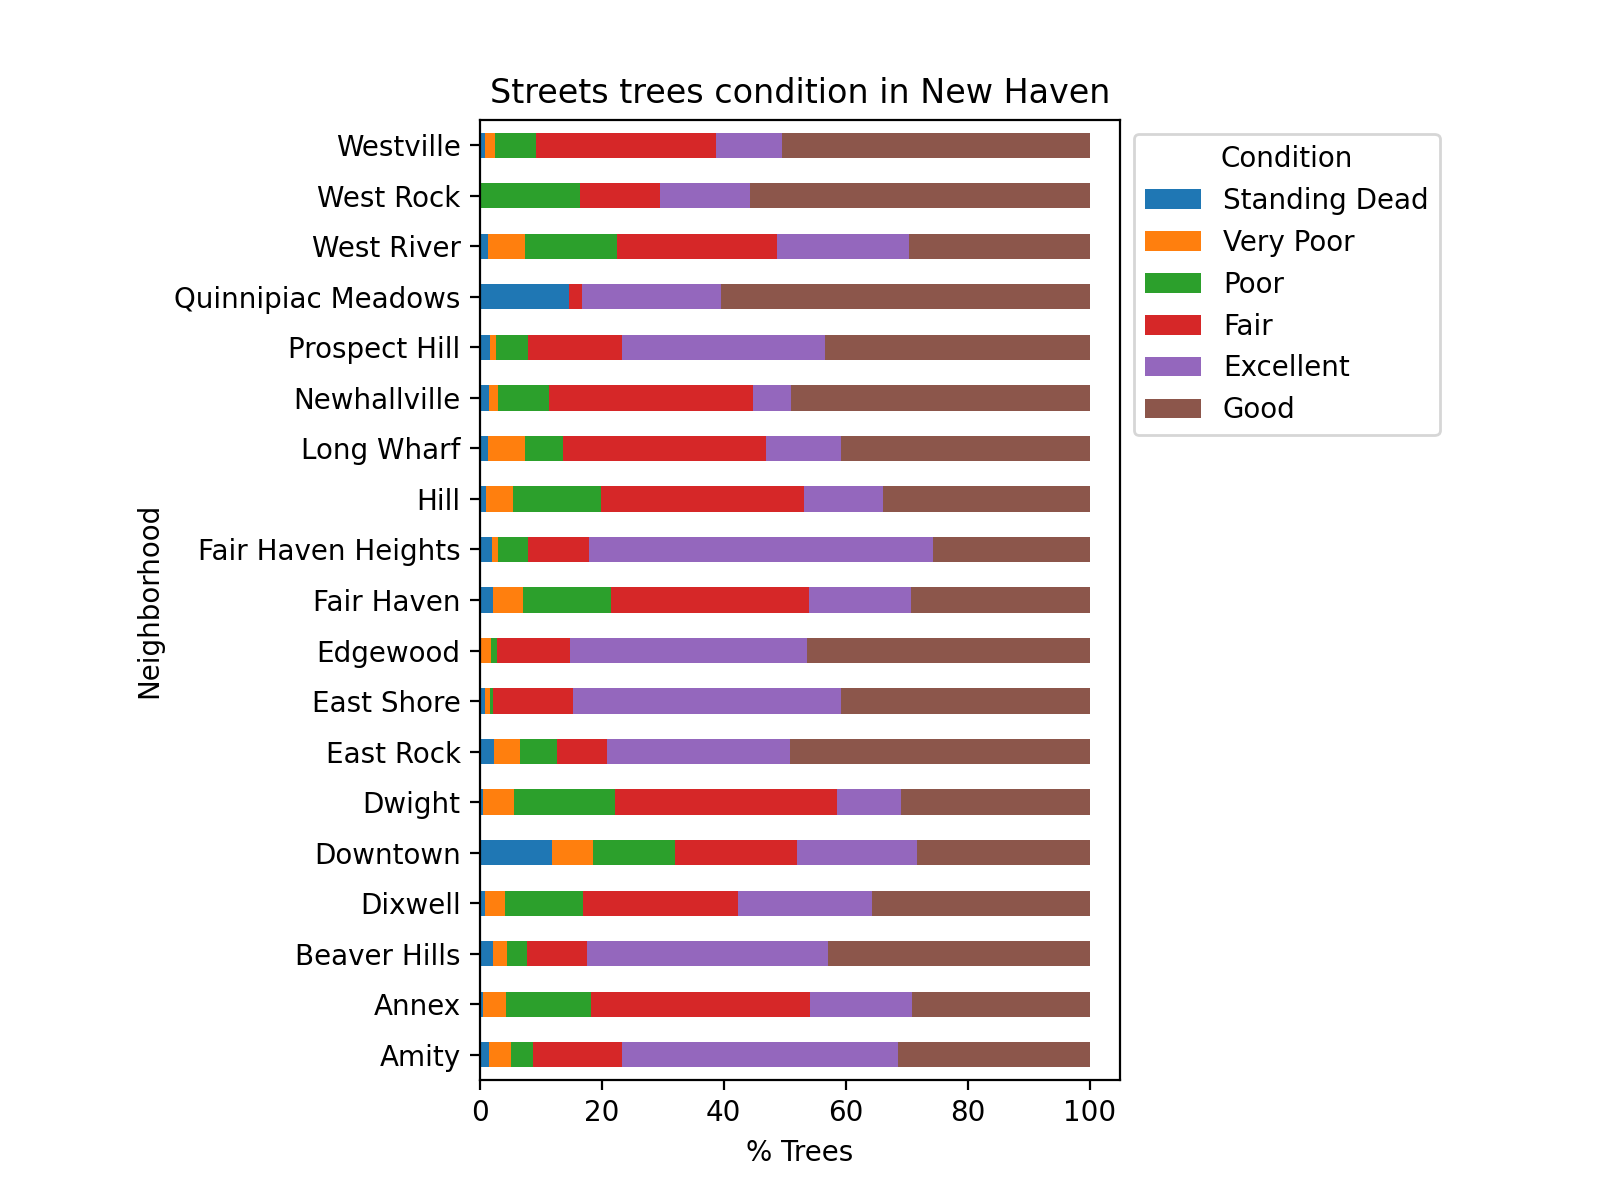

In [ ]:
# Assuming df_cond is your DataFrame containing the percentages of trees in each condition for each neighborhood

# Set the neighborhood column as the index for plotting
df_cond.set_index('Neighborhood', inplace=True)

# Reorder the columns of df_cond so that the conditions with lower values are shown first
df_cond_percent = df_cond[df_cond.sum().sort_values().index]

# Plot the DataFrame as a stacked bar plot
ax = df_cond_percent.plot(kind='barh', stacked=True, figsize=(8, 6))

# Add labels and title
plt.title('Streets trees condition in New Haven')
plt.xlabel('% Trees')
plt.ylabel('Neighborhood')

# Add legend
plt.legend(title='Condition', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust margins to expand the display area
plt.subplots_adjust(left=0.3, right=0.7, top=0.9, bottom=0.1)

# Show plot
plt.show()

In [ ]:
df_cond_percent

Condition,Standing Dead,Very Poor,Poor,Fair,Excellent,Good
Neighborhood,,,,,,
Amity,1.459854,3.649635,3.649635,14.598540,45.255474,31.386861
Annex,0.525624,3.679369,13.929041,36.005256,16.688568,29.172142
Beaver Hills,2.197802,2.197802,3.296703,9.890110,39.560440,42.857143
Dixwell,0.858984,3.221188,12.884753,25.411596,21.975662,35.647817
Downtown,11.855670,6.701031,13.402062,20.103093,19.587629,28.350515
Dwight,0.563698,4.960541,16.685457,36.414882,10.484780,30.890643
East Rock,2.259887,4.237288,6.214689,8.192090,29.943503,49.152542
East Shore,0.851064,0.851064,0.425532,13.191489,43.829787,40.851064
Edgewood,0.000000,1.851852,0.925926,12.037037,38.888889,46.296296


In [ ]:
df_map_prueba= df_cond.merge(clean_nei, how='outer', on='Neighborhood', indicator = True)

In [ ]:
df_map_prueba.head()

 ###### Neighborhood with the highest percentage of trees in Excellent condition.



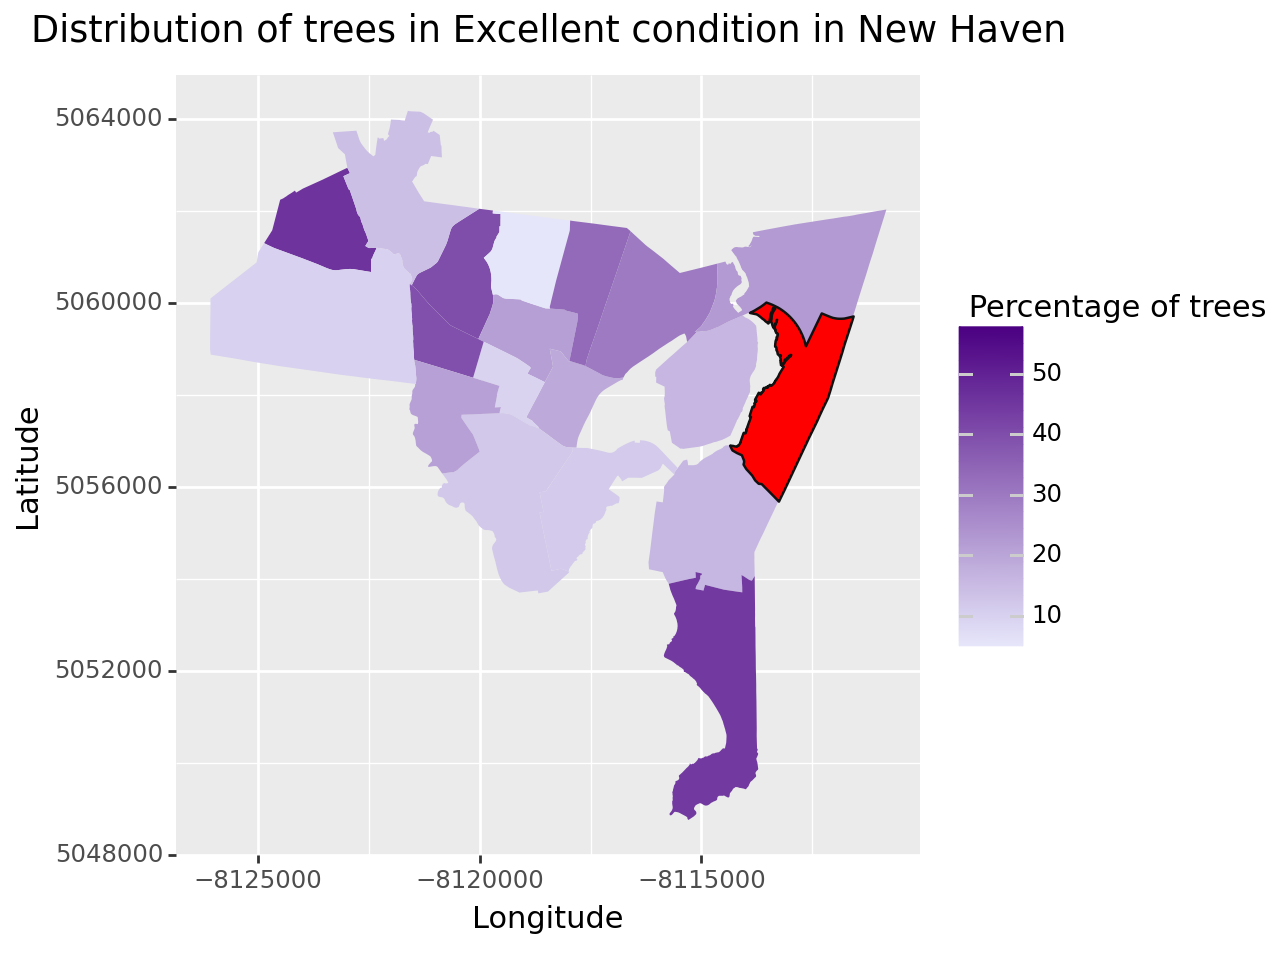

<Figure Size: (640 x 480)>

In [ ]:
# Neighborhood that has the trees in the poorest condition

# Calculate the maximum value of the "Excellent" column
max_value = df_map_prueba['Excellent'].max()
# Map of percentage of trees that are in excellent conditions
(
  ggplot()
   + geom_map(df_map_prueba, aes(geometry='geometry', fill="Excellent"),color=None)
   + scale_fill_gradient(low = "#e6e6fa", high = "#4b0082")
   + geom_map(df_map_prueba[df_map_prueba['Excellent'] == max_value], aes(geometry='geometry'), fill="red")
   + xlab('Longitude')
   + ylab('Latitude')
   + ggtitle("Distribution of trees in Excellent condition in New Haven")
   + theme(plot_title = element_text(hjust = 0.8))
   + labs(fill=" Percentage of trees")
  )

In [ ]:
# Sort the results of DataFrame
exe_sort=df_map_prueba.sort_values(by=["Excellent"], ascending=False)
print(exe_sort.head(1))

          Neighborhood  Excellent     Fair       Good      Poor  \
10  Fair Haven Heights  56.435644  9.90099  25.742574  4.950495   

    Standing Dead  Very Poor  OBJECTID   ACRES          Neighborho  \
10       1.980198   0.990099         2  735.32  FAIR-HAVEN_HEIGHTS   

      Shape_area     Shape_len    Shape__Are    Shape__Len UTC_2016  \
10  3.203041e+07  38568.494445  5.278494e+06  15666.385799      .43   

                                             geometry _merge  
10  POLYGON ((-8113555.576 5060015.669, -8113546.0...   both  


###### Neighborhood with the highest percentage of trees in Very poor condition


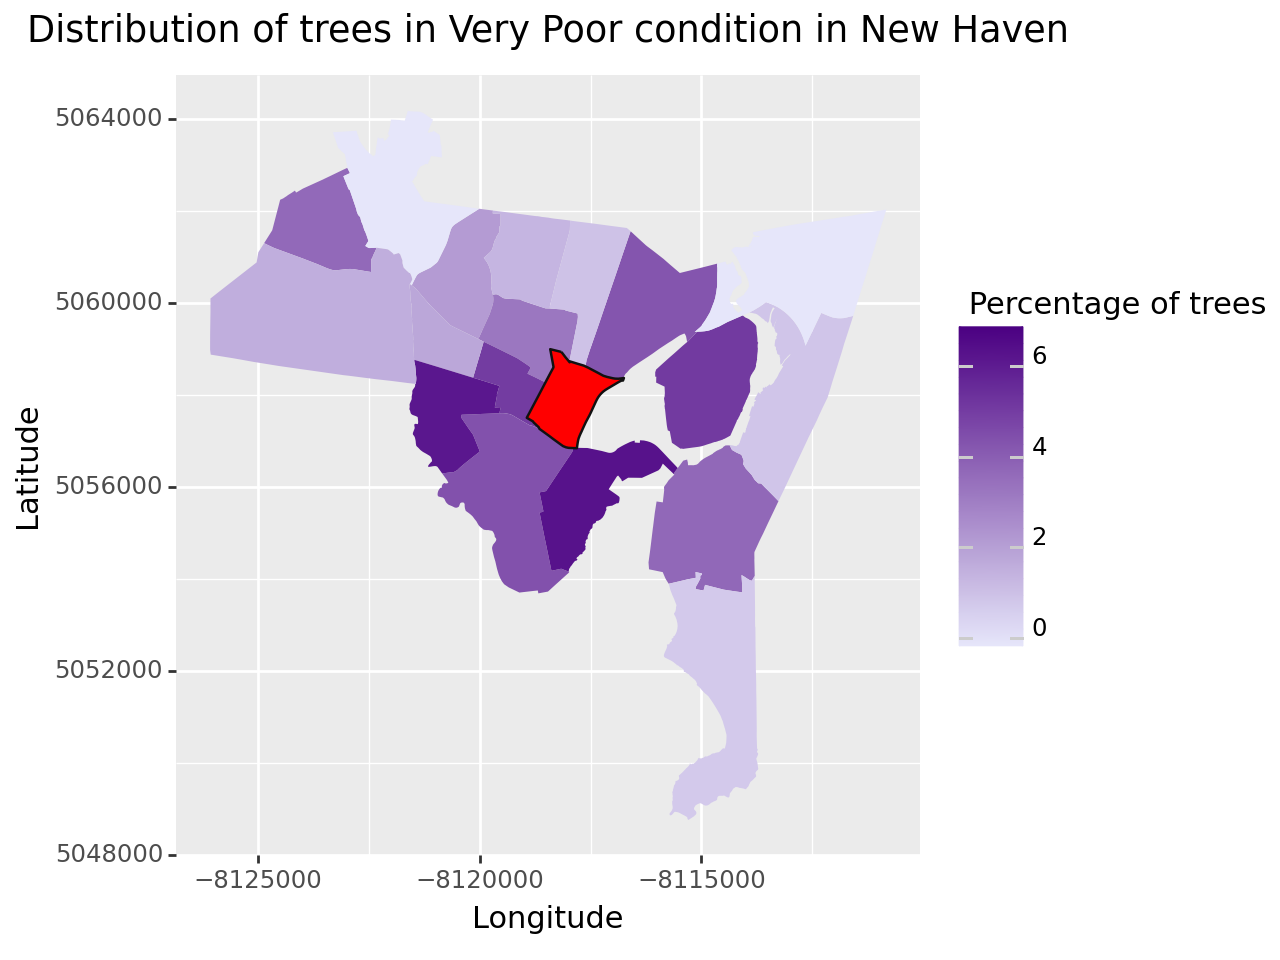

<Figure Size: (640 x 480)>

In [ ]:
# Calculate the maximum value of the "Very Poor" column
max_value = df_map_prueba['Very Poor'].max()
# Map of percentage of trees that are in very poor conditions
(
  ggplot()
   + geom_map(df_map_prueba, aes(geometry='geometry', fill="Very Poor"),color=None)
   + scale_fill_gradient(low = "#e6e6fa", high = "#4b0082")
   + geom_map(df_map_prueba[df_map_prueba['Very Poor'] == max_value], aes(geometry='geometry'), fill="red")
   + xlab('Longitude')
   + ylab('Latitude')
   + ggtitle("Distribution of trees in Very Poor condition in New Haven")
   + theme(plot_title = element_text(hjust = 0.8))
   + labs(fill=" Percentage of trees")
  )

In [ ]:
# Sort the results of DataFrame
exe_sort=df_map_prueba.sort_values(by=["Very Poor"], ascending=False)
print(exe_sort.head(1))

  Neighborhood  Excellent       Fair       Good       Poor  Standing Dead  \
4     Downtown  19.587629  20.103093  28.350515  13.402062       11.85567   

   Very Poor  OBJECTID   ACRES Neighborho    Shape_area     Shape_len  \
4   6.701031         9  302.08   DOWNTOWN  1.315854e+07  16821.576475   

     Shape__Are   Shape__Len UTC_2016  \
4  2.168458e+06  6828.556824      .17   

                                            geometry _merge  
4  POLYGON ((-8118173.770 5058949.906, -8118143.2...   both  


###### Comparison Map between condition and biodiversity

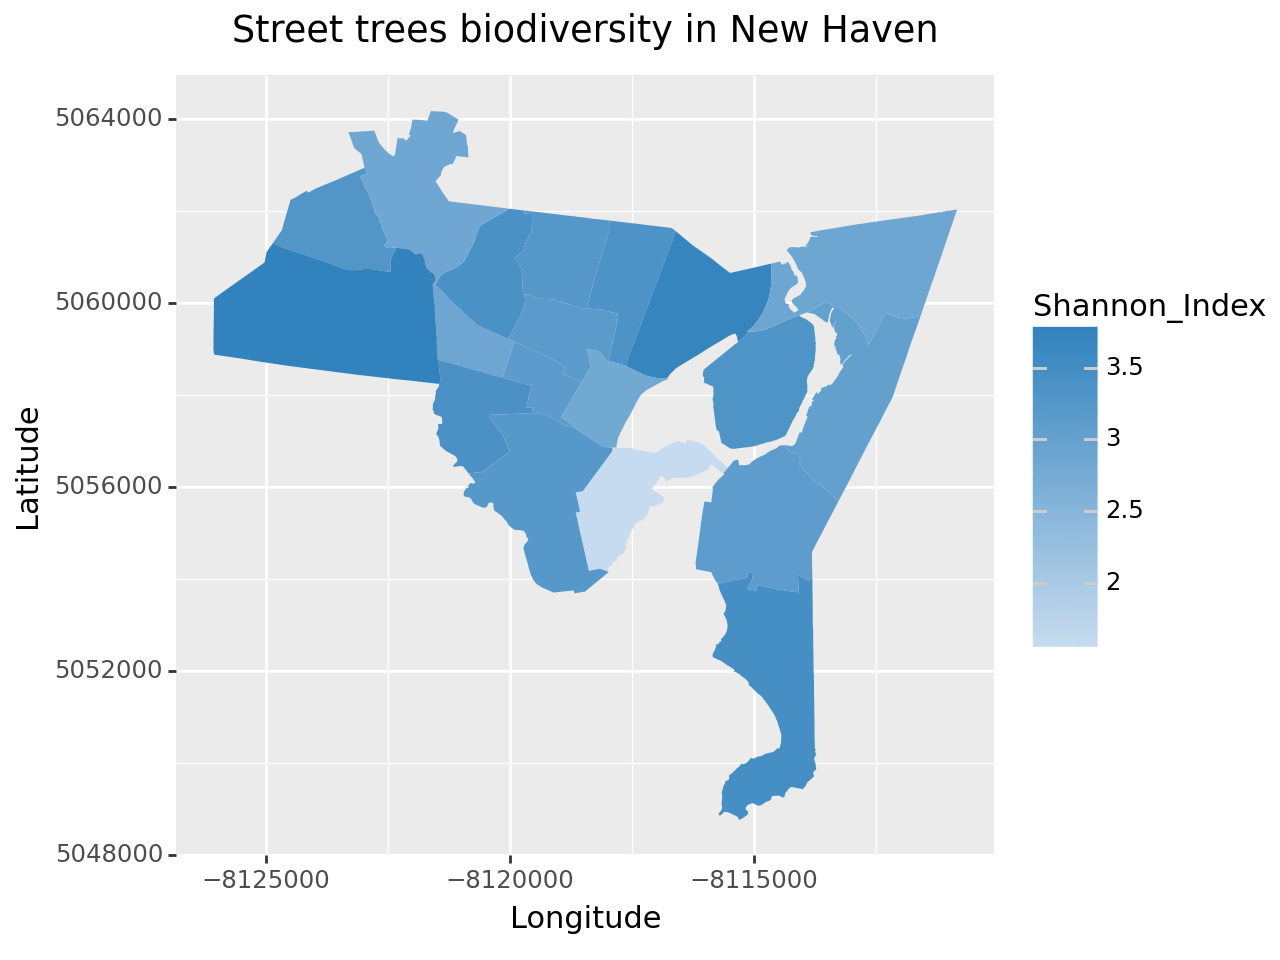

<Figure Size: (640 x 480)>

In [ ]:
# Map biodiversity index

# Calculate the minimum value of the Shannon_Index column
min_value = map_biodiversity['Shannon_Index'].min()
(
  ggplot()
   + geom_map(map_biodiversity, aes(geometry='geometry', fill="Shannon_Index"),color=None)
   + scale_fill_gradient(low="#c6dbef", high="#3182bd")
  # + geom_map(map_biodiversity[map_biodiversity['Shannon_Index'] == min_value], aes(geometry='geometry'), fill="red")
   + xlab('Longitude')
   + ylab('Latitude')
   + ggtitle("Street trees biodiversity in New Haven")
   + theme(plot_title = element_text(hjust = 0.8))
)

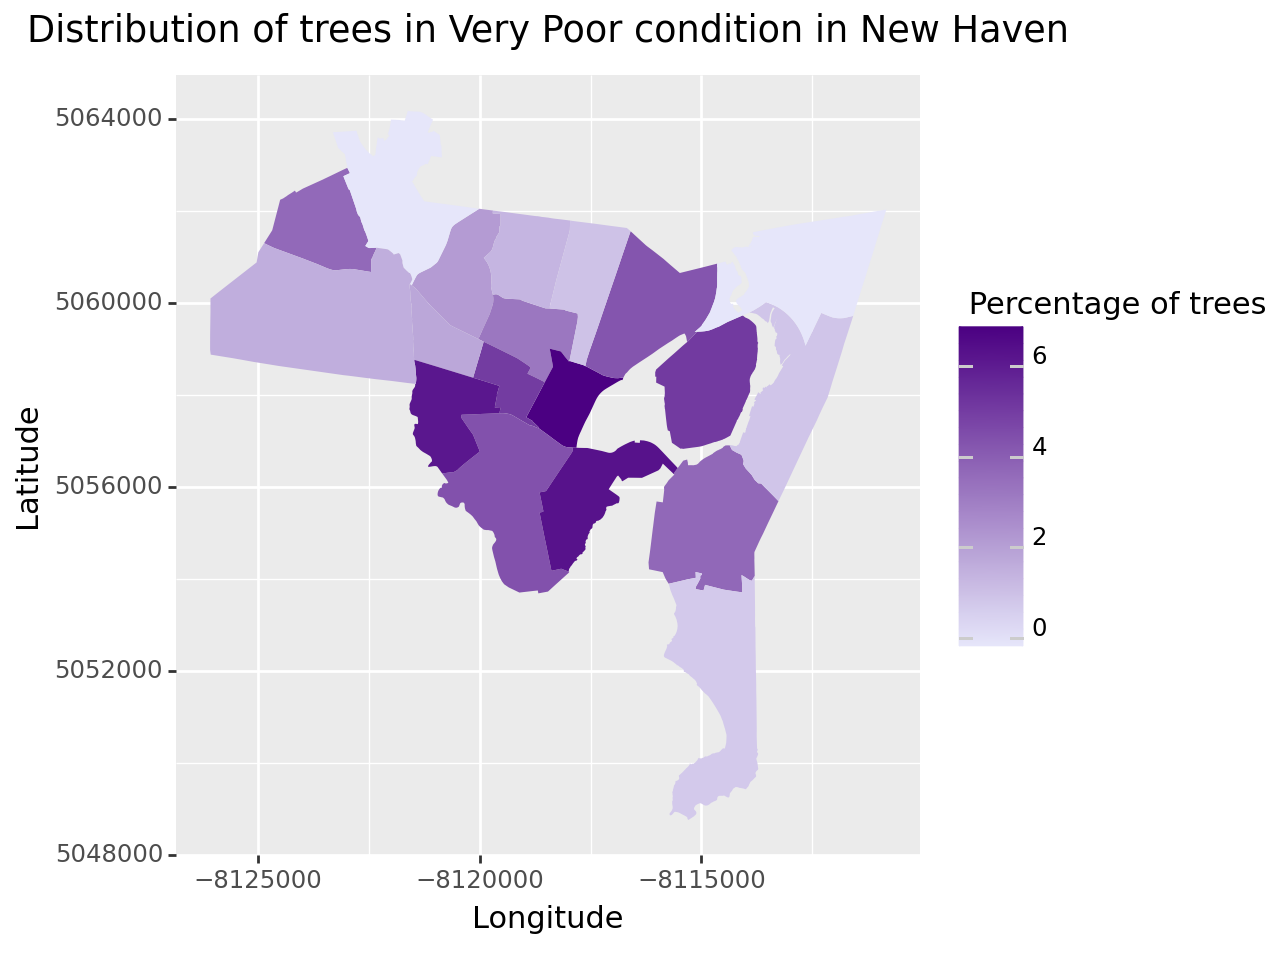

<Figure Size: (640 x 480)>

In [ ]:
# Calculate the maximum value of the "Very Poor" column
max_value = df_map_prueba['Very Poor'].max()
# Map of percentage of trees that are in very poor conditions
(
  ggplot()
   + geom_map(df_map_prueba, aes(geometry='geometry', fill="Very Poor"),color=None)
   + scale_fill_gradient(low = "#e6e6fa", high = "#4b0082")
   #+ geom_map(df_map_prueba[df_map_prueba['Very Poor'] == max_value], aes(geometry='geometry'), fill="red")
   + xlab('Longitude')
   + ylab('Latitude')
   + ggtitle("Distribution of trees in Very Poor condition in New Haven")
   + theme(plot_title = element_text(hjust = 0.8))
   + labs(fill=" Percentage of trees")
  )

### Conclusions

* The most common specie in New Haven is Quercus palustris (Pin oak).

* The most street trees biodiverse neighborhood in New Haven is Westville.

* Most of the trees in New Haven are in good and excellent conditions.

* Biodiversity is not always related with the condition of street trees in New Haven. There must be other factors that are influencing  the condition of these trees such as the presence of wires.

* Long Wharf is the neigborhood where streets trees are not very diverse. Future activities shold concentrate in this neighborhood as it is also one of the neighborhoods with a higher amount of trees in very poor condition.

* Future research should evaluate not only streets trees, but the bioidiversity in parks, houses and other departments.
